In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import os
import pandas as pd
contents = []
dir ='C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset'
try: 
    for file in os.listdir(dir):
        if file.endswith(".txt"):
            with open( os.path.join(dir,file ) ,"r") as fd:
                print (fd.name)
                #print (fd.sort_values(by=name))
                str1 = fd.read()
                contents.append(str1[37:])
    print("Done!")
except:
    print(fd.name)
    
print (contents)

C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-0ea1d17f528afc1d5d566b856565b815671f0c416d2eb1b313d57de719f80f5f.txt
C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-13a72a520a2de3b6a3ea2c3c5d07d7c580f3babfdacfb9c93ea233b6d4088448.txt
C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-19a4571000d00510f823a2ab93f09e758205e81a369ca1f5af570da220870015.txt
C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-1bb086985a6a088646529b08bacbad0d23e0f17e87903b28b5114c329d3b9d30.txt
C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-1e482add9bec78f3959e2560a3d0f52bd5eeb682df7b9d3259dd962be9c03337.txt
C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-22acb2835a3a309adfe071806389270caafc183e03a7815114fc06a9ebd2cfc4.txt
C:/Users/IEUser/Desktop/Assignment/IOT_unseen/iot_unseen_dataset\opcode-23d521747edc403a08fc23654a0fe2535eec1341830bc28cb766947cfa1a5336.txt
C:/Users/IEUs

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(contents)


first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)
nup = df.to_numpy()

header = ""

first = True
for item in tfidf_vectorizer.get_feature_names():
    if not first:
        header = header + ","
    else:
        first = False
    header = header + item

header = header + "\n"
for item in tfidf_vectorizer_vectors:
    first_vector_tfidfvectorizer = item
    df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
    df.sort_values(by=["tfidf"],ascending=False)
    nup = df.to_numpy()
    first = True
    
    for item2 in nup:
        if not first:
            header = header + ","
        else:
            first = False
        header = header + str(item2[0])
    header = header + ",1"    
    header = header + "\n"

outfile = open('Dataset.csv', 'w')
outfile.write(header)
outfile.close()

In [8]:
import shutil
import glob

#import csv files from folder
path = r'C:/Users/IEUser/Desktop/Assignment/IOT_unseen/Intial_CSV'
allFiles = glob.glob(path + "/*.csv")
with open('Outputfile.csv', 'wb') as outfile:
    for i, fname in enumerate(allFiles):
        with open(fname, 'rb') as infile:
            if i != 0:
                infile.readline()  # Throw away header on all but first file
            # Block copy rest of file from input to output without parsing
            shutil.copyfileobj(infile, outfile)
            print(fname + " has been imported.")

C:/Users/IEUser/Desktop/Assignment/IOT_unseen/Intial_CSV\Dataset.csv has been imported.


In [29]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
missing_values = ["n/a", "na", "--","NaN"]
data = pd.read_csv("Dataset.csv", na_values = missing_values)
print(data.shape)
print (data.head())
data1= data.iloc[:,2:]
print (data1.head())
data1['bnd'] = data1['bnd'].astype('int')

(51, 668)
        287     8087       aaa       aad       aam       aas       adc  \
0  0.000000  0.00000  0.009241  0.001613  0.003225  0.002504  0.080673   
1  0.000148  0.00056  0.033416  0.010568  0.019762  0.043950  0.177941   
2  0.000000  0.00000  0.024890  0.001554  0.005179  0.002072  0.059049   
3  0.000000  0.00000  0.001699  0.000974  0.003247  0.001407  0.097102   
4  0.000000  0.00000  0.008397  0.002018  0.002935  0.002568  0.090483   

        add     addps    addr16  ...  xrstor  xrstors  xsave    xsavec  \
0  0.855304  0.000000  0.004965  ...     0.0      0.0    0.0  0.000000   
1  0.259910  0.000281  0.024416  ...     0.0      0.0    0.0  0.000121   
2  0.841453  0.000000  0.025376  ...     0.0      0.0    0.0  0.000000   
3  0.872663  0.000000  0.009309  ...     0.0      0.0    0.0  0.000000   
4  0.818704  0.000000  0.008684  ...     0.0      0.0    0.0  0.000000   

   xsaveopt    xsaves     xsha1   xsha256    xstore  label  
0       0.0  0.000000  0.000000  0.0000

In [30]:
data1.bnd[data.bnd != 0] = 1
#data1.bnd[data.bnd != 'Attack'] = 1

c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
print (data1.bnd.head(20))
mid = data1['bnd']
data1.drop(labels=['bnd'], axis=1,inplace = True)
data1.insert(0, 'bnd', mid)

0     0
1     1
2     0
3     0
4     0
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    1
14    0
15    0
16    1
17    1
18    1
19    1
Name: bnd, dtype: int32


In [34]:
data1.to_csv (r'IOT_unseen_final.csv', index = False, header=True)

In [35]:
df = pd.read_csv("IOT_unseen_final.csv")
print(df.shape)
print(df.head(20))

(51, 666)
    bnd       aaa       aad       aam       aas       adc       add     addps  \
0     0  0.009241  0.001613  0.003225  0.002504  0.080673  0.855304  0.000000   
1     1  0.033416  0.010568  0.019762  0.043950  0.177941  0.259910  0.000281   
2     0  0.024890  0.001554  0.005179  0.002072  0.059049  0.841453  0.000000   
3     0  0.001699  0.000974  0.003247  0.001407  0.097102  0.872663  0.000000   
4     0  0.008397  0.002018  0.002935  0.002568  0.090483  0.818704  0.000000   
5     1  0.018343  0.008264  0.016092  0.015657  0.089108  0.728358  0.000000   
6     1  0.021590  0.023012  0.027014  0.027681  0.147947  0.218652  0.000000   
7     1  0.027327  0.028242  0.023281  0.023281  0.141088  0.223702  0.000000   
8     0  0.004438  0.003104  0.003104  0.003005  0.083663  0.780414  0.000000   
9     0  0.008476  0.000968  0.003595  0.002074  0.082087  0.809231  0.000000   
10    0  0.014120  0.000000  0.000000  0.000000  0.051294  0.974593  0.000000   
11    0  0.027987 

In [36]:
from time import time
start = time()
%run fairtree.py 1 2 20 IOT_unseen_final.csv
from time import time
end = time()
duration = end- start
print(duration)

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 51
Dimension: 665
Balance: 1 2
Constructing tree...
Doing fair clustering...
Fairlet decomposition time: 0.4381442070007324
Fairlet decomposition cost: 15.668527416741208
Doing k-median clustering on fairlet centers...
Computing fair k-median cost...
Fairlet decomposition cost: 15.668527416741208
k-Median cost: 15.668527416741208
88.93099188804626


In [6]:
%run accuracy_fairtree.py 1 2 2 IOT_unseen_final.csv

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 51
Dimension: 665
Balance: 1 2
Constructing tree...
Doing fair clustering...
Fairlet decomposition cost: 16.09705948068042
Doing k-median clustering on fairlet centers...
FAIRLET_CENTERS [2, 4, 8, 9, 34, 33, 15, 21, 25, 26, 30, 29, 31, 32, 35, 37, 41, 45, 46, 49]
20
fairlet_center_idx [array([2.48900837e-02, 1.55364659e-03, 5.17882197e-03, 2.07152879e-03,
       5.90493355e-02, 8.41453031e-01, 0.00000000e+00, 2.53762276e-02,
       0.00000000e+00, 1.10717504e-01, 0.00000000e+00, 0.00000000e+00,
       5.59312772e-02, 6.27399190e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.13699595e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.86437591e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.33625884e-03,
       0.00000000e+00, 2.30661467e-02, 1.1393408

mat_matx [[0.02489008365621291,0.0015536465898865384,0.00517882196628846,0.002071528786515384,0.059049335516197274,0.8414530311058113,0.0,0.025376227634813456,0.0,0.1107175040928699,0.0,0.0,0.05593127723591537,0.06273991898595961,0.0,0.0,0.0,0.0,0.031369959492979806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018643759078638456,0.0,0.0,0.0,0.006336258844275793,0.0,0.023066146686014564,0.011393408325834612,0.0,0.0,0.0062145863595461535,0.0009257850497907064,0.00517882196628846,0.0,0.0,0.0,0.0025744605149487705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002860287694199959,0.0,0.0,0.0006999452262891191,0.0,0.05593127723591537,0.0,0.0,0.002071528786515384,0.0018549690988078926,0.0,0.0,0.0,0.0,0.010149104541846407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009321879539319228,0.00258941098314423,0.028602021890658063,0.00258941098314423,0.13470629664632505,0.007128447256349762,0.0,0.0,0.0017821118140874405,0.0,0.0,0.00258941098314423,0.0,0.002071528786515384,0.0,0.0,0.0015536465898865384,0.0,0.0,0.0,0.0,

Fairlet decomposition cost: 16.09705948068042
k-Median cost: 20.843170053889555


In [1]:
%run multi_cluster_accuracy_fairtree.py 1 2 2 IOT_unseen_final.csv

Loading data from input CSV file
Invalid color label in line 0 , skipping
Number of data points: 51
Dimension: 665
Balance: 1 2
Constructing tree...
Doing fair clustering...
Fairlet decomposition cost: 16.143919841265653
Doing k-median clustering on fairlet centers...
20
Label [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
20
res_idx [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0]
20
no of cluster is: 2
idx: 1 normalcount 0
idx: 1 malwarecount 16
idx: 2 normalcount 0
idx: 2 malwarecount 4
actual:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
pred:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy-1
[[20  0]
 [ 0  0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           0       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        20
   macro avg       0.50      0.50      0.50        

c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
from sklearn.feature_selection import SelectKBest, chi2
pima = pd.read_csv("IOT_unseen_final.csv")
print (pima.head())
X = pima.iloc[:,0:666]  #independent columns
y = pima.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

   bnd       aaa       aad       aam       aas       adc       add     addps  \
0    0  0.009241  0.001613  0.003225  0.002504  0.080673  0.855304  0.000000   
1    1  0.033416  0.010568  0.019762  0.043950  0.177941  0.259910  0.000281   
2    0  0.024890  0.001554  0.005179  0.002072  0.059049  0.841453  0.000000   
3    0  0.001699  0.000974  0.003247  0.001407  0.097102  0.872663  0.000000   
4    0  0.008397  0.002018  0.002935  0.002568  0.090483  0.818704  0.000000   

     addr16  addsd  ...  xrstor  xrstors  xsave    xsavec  xsaveopt    xsaves  \
0  0.004965    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   
1  0.024416    0.0  ...     0.0      0.0    0.0  0.000121       0.0  0.000341   
2  0.025376    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   
3  0.009309    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   
4  0.008684    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   

      xsha1   xsha256    xstore 

   bnd       aaa       aad       aam       aas       adc       add     addps  \
0    0  0.009241  0.001613  0.003225  0.002504  0.080673  0.855304  0.000000   
1    1  0.033416  0.010568  0.019762  0.043950  0.177941  0.259910  0.000281   
2    0  0.024890  0.001554  0.005179  0.002072  0.059049  0.841453  0.000000   
3    0  0.001699  0.000974  0.003247  0.001407  0.097102  0.872663  0.000000   
4    0  0.008397  0.002018  0.002935  0.002568  0.090483  0.818704  0.000000   

     addr16  addsd  ...  xrstor  xrstors  xsave    xsavec  xsaveopt    xsaves  \
0  0.004965    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   
1  0.024416    0.0  ...     0.0      0.0    0.0  0.000121       0.0  0.000341   
2  0.025376    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   
3  0.009309    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   
4  0.008684    0.0  ...     0.0      0.0    0.0  0.000000       0.0  0.000000   

      xsha1   xsha256    xstore 

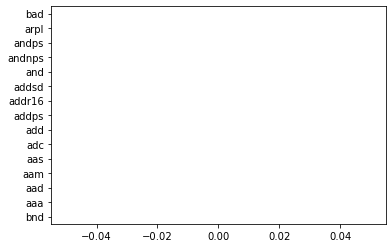

In [46]:
pima = pd.read_csv("IOT_unseen_final.csv")
print (pima.head())
X = pima.iloc[:,0:665]  #independent columns
#y = pima.iloc[:,-1]    #target column i.e price range
Y= pima['label']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

   bnd       aaa       aad       aam       aas       adc       add     addps  \
0    0  0.009241  0.001613  0.003225  0.002504  0.080673  0.855304  0.000000   
1    1  0.033416  0.010568  0.019762  0.043950  0.177941  0.259910  0.000281   
2    0  0.024890  0.001554  0.005179  0.002072  0.059049  0.841453  0.000000   
3    0  0.001699  0.000974  0.003247  0.001407  0.097102  0.872663  0.000000   
4    0  0.008397  0.002018  0.002935  0.002568  0.090483  0.818704  0.000000   

     addr16  addsd  ...  xrelease  xrstor  xrstors  xsave    xsavec  xsaveopt  \
0  0.004965    0.0  ...   0.00000     0.0      0.0    0.0  0.000000       0.0   
1  0.024416    0.0  ...   0.00042     0.0      0.0    0.0  0.000121       0.0   
2  0.025376    0.0  ...   0.00000     0.0      0.0    0.0  0.000000       0.0   
3  0.009309    0.0  ...   0.00000     0.0      0.0    0.0  0.000000       0.0   
4  0.008684    0.0  ...   0.00000     0.0      0.0    0.0  0.000000       0.0   

     xsaves     xsha1   xsha256 

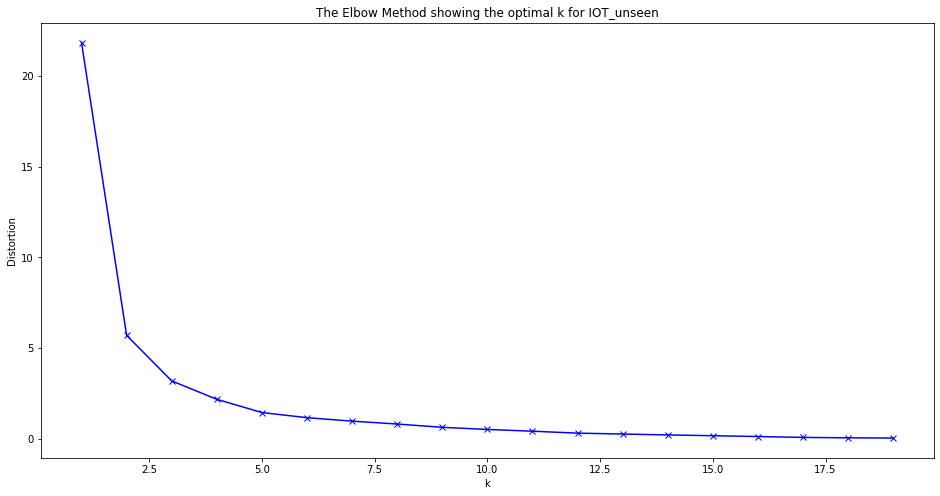

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
data=pd.read_csv("IOT_unseen_final.csv")
df = data.iloc[:,0:665]
print(df.head(5))
print(df.shape)
#feature_cols= ['P_J422_code','F_PU6','F_PU11','S_PU6','S_PU11','F_PU7']
#we are usingh
#df=df[feature_cols]
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for IOT_unseen')
plt.show()

In [3]:
import matlab.engine
import numpy as np
import pandas as pd
df=pd.read_csv("IOT_unseen_final.csv")
X = df.iloc[:,0:665] 
Y= df['label']
res1=np.asarray(Y)
df1=np.asarray(X)
data=matlab.double(df1.tolist())
print("data is", data)
idx,C,sumd,D,midx,info = eng.kmedoids(data, 2,'Distance','euclidean', nargout=6)
print("idx is: ", idx)

data is [[0.0,0.009240815800516071,0.0016126556435916485,0.003225311287183297,0.002503860078208086,0.08067268711042756,0.8553043795095706,0.0,0.0049652818500058645,0.0,0.14875680589481372,0.0,0.0,0.040825650766714884,0.08898945897748195,0.0,0.0,0.0,0.0,0.020300484057310032,0.0,0.0,7.586425999744533e-05,0.0,0.0,0.0,0.0,0.0,0.019012361271817328,0.0,0.0,0.0,0.0003028843033788333,0.0,0.002495031560116317,0.002503860078208086,0.0,0.0,0.0009336427410267436,0.0,0.0020794770141050203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.480058517513605e-05,0.0,0.0,0.0,0.0,0.0,0.06654326445136065,0.0,0.0,0.0010609576602576634,0.0,0.0,0.0,0.0,0.0,0.011454463071443087,0.0,0.0,0.0,0.0,0.0,0.0,9.021029913214744e-05,0.0,0.0,0.0,7.392519350775934e-05,0.0,0.0,0.002631174997439005,0.0015702173371813415,0.05077011189751838,0.005177473382057397,0.08029465202556145,0.0,0.0,0.0,0.001509045904773614,0.0,0.0,0.0023341068525668594,0.0,0.0004243830641030653,0.0,0.0,0.0021219153205153268,0.0,0.00012801380761875828,0.0,0.0,

idx is:  [[2.0],[1.0],[2.0],[2.0],[2.0],[1.0],[1.0],[1.0],[2.0],[2.0],[2.0],[2.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[1.0],[1.0],[1.0],[2.0],[2.0],[2.0],[1.0],[2.0],[2.0],[1.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[2.0],[1.0],[2.0],[1.0],[1.0],[2.0],[2.0],[2.0],[1.0],[1.0],[2.0],[2.0],[1.0],[1.0],[2.0],[2.0]]


In [4]:
res_idx = [sub[0] for sub in idx]
print("res_idx",res_idx)
print(len(res_idx))


res_idx1=np.asarray(res_idx)
res_idx1=res_idx1.astype('int32') 
res_idx1=np.where(res_idx1==1, 0, res_idx1)
res_idx1=np.where(res_idx1==2, 1, res_idx1)
print("res_idx1",res_idx1)
print("label is: ",res1)
#accuracy
actual=res1.tolist()
pred=res_idx1.tolist()
print("accuracy-1")
print(metrics.confusion_matrix(actual, pred, labels=[1, 0]))
print(metrics.classification_report(actual, pred, labels=[1, 0]))

#accuracy2
res_idx1=np.asarray(res_idx)
res_idx1=res_idx1.astype('int32') 
res_idx1=np.where(res_idx1==2, 0, res_idx1)
res_idx1=np.where(res_idx1==1, 1, res_idx1)
print("res_idx1",res_idx1)


actual=res1.tolist()
pred=res_idx1.tolist()
print("accuracy-2")
print(metrics.confusion_matrix(actual, pred, labels=[1, 0]))
print(metrics.classification_report(actual, pred, labels=[1, 0]))

res_idx [2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0]
51
res_idx1 [1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1]
label is:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy-1
[[31 20]
 [ 0  0]]
              precision    recall  f1-score   support

           1       1.00      0.61      0.76        51
           0       0.00      0.00      0.00         0

    accuracy                           0.61        51
   macro avg       0.50      0.30      0.38        51
weighted avg       1.00      0.61      0.76        51

res_idx1 [0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 1 0 0 1 1 0 0]
accuracy-2
[[20 31]
 [ 0  0]]
  

c:\users\ieuser\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
